# Univariate Time-Series Forecasting of Gold Value

The dataset has been imported from Quandl which is a platform for financial, economic, and alternative datasets. It was shared by Möbius in the Kaggle dataset https://www.kaggle.com/arashnic/learn-time-series-forecasting-from-gold-price.

In [189]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA

gold_value_df = pd.read_csv(r"C:\Users\User\Desktop\DataCamp\Python\Projects\Voluntary Projects\13. Gold Price (Time Series Forecasting)\gold_price_data.csv")

display(gold_value_df.head())

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [169]:
gold_value_df = gold_value_df.set_index("Date")
display(gold_value_df.head(10))

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4
1971-04-01,38.9
1971-07-01,40.1
1971-10-01,42.0
1972-01-03,43.5


In [170]:
print(gold_value_df.dtypes)

Value    float64
dtype: object


In [171]:
gold_value_df.index = pd.to_datetime(gold_value_df.index)
gold_value_df.index = pd.DatetimeIndex(gold_value_df.index).to_period('M')

print("There are {} observations with {} variable.".format(gold_value_df.shape[0], gold_value_df.shape[1]))

There are 10787 observations with 1 variable.


In [172]:
print(gold_value_df.isnull().sum())

Value    0
dtype: int64


Luckily, there is no missing values in the dataset.

In [173]:
print(gold_value_df.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 10787 entries, 1970-01 to 2020-03
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5 KB
None


The gold value data has been collected since 1 January 1970 until 13 March 2020. 

In [174]:
print(gold_value_df.describe())

              Value
count  10787.000000
mean     653.596634
std      434.030848
min       35.100000
25%      349.200000
50%      409.350000
75%     1061.625000
max     1895.000000


There is a big jump of gold value from 35.10 to 1895.00 with the mean value of the gold is at 653.60.

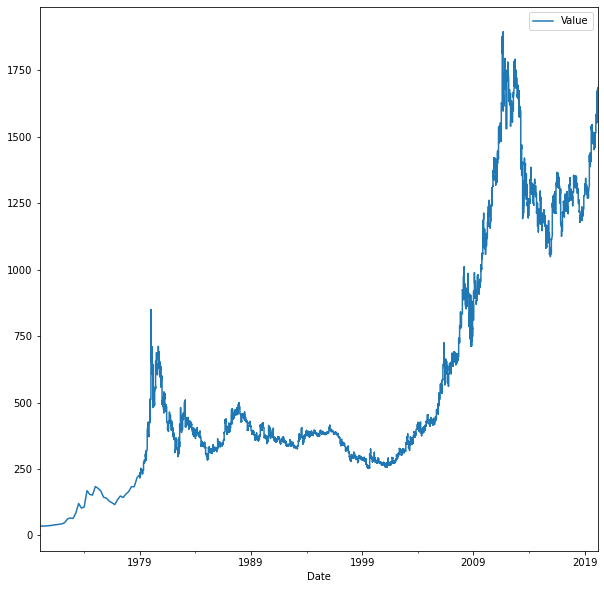

In [175]:
gold_value_df.plot(figsize=(10,10))
plt.show()

Notice the value of gold spiked over the years but it seems there is no seasonility in the dataset.

In [176]:
returns = gold_value_df.pct_change()
autocorrelation = returns["Value"].autocorr()
print("The autocorrelation of quarterly returns was %4.2f" %(autocorrelation))

The autocorrelation of quarterly returns was 0.03


Notice how the autocorrelation of returns with one lag for gold_value_df is positive, so the gold value is momentum or trend following.

In [177]:
chg_gold_value = gold_value_df.diff()
chg_gold_value = chg_gold_value.dropna()

display(chg_gold_value.head())

,Value
Date,
1970-04,-0.1
1970-07,0.3
1970-10,0.8
1971-01,1.2
1971-04,1.5


In [178]:
display(chg_gold_value.tail())

,Value
Date,
2020-03,-11.15
2020-03,-16.80
2020-03,-1.95
2020-03,-83.05
2020-03,-7.90


The chg_gold_value dataframe is a dataframe that contains the difference between each observation with the previous observation.

In [179]:
print(acf(chg_gold_value, fft=False))

[ 1.00000000e+00 -1.20878000e-02 -2.05226581e-02  2.82036856e-02
 -1.17789024e-02 -1.35974968e-02 -1.53568350e-02 -1.10965287e-02
 -1.65317839e-02  4.09957630e-02 -5.52650706e-03 -2.86667570e-02
  2.01076492e-02  4.22577118e-02 -2.83135991e-02 -1.11359050e-02
  8.08344759e-03 -3.96793403e-03  4.64886552e-03  4.77913663e-03
  3.17690762e-02 -5.15921845e-02  6.93936721e-03  5.45714273e-03
 -2.62695380e-02  3.08467156e-03  5.91631791e-03 -2.76617849e-02
 -2.48515475e-03  2.26079768e-02 -1.61151594e-02 -1.90880936e-04
 -1.93498129e-02  1.00922442e-02 -1.30846208e-02  2.69895850e-03
 -1.03885301e-02 -2.16427105e-02  5.27132534e-03  2.94210302e-02
 -1.63380170e-02]


C:\Users\User\anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


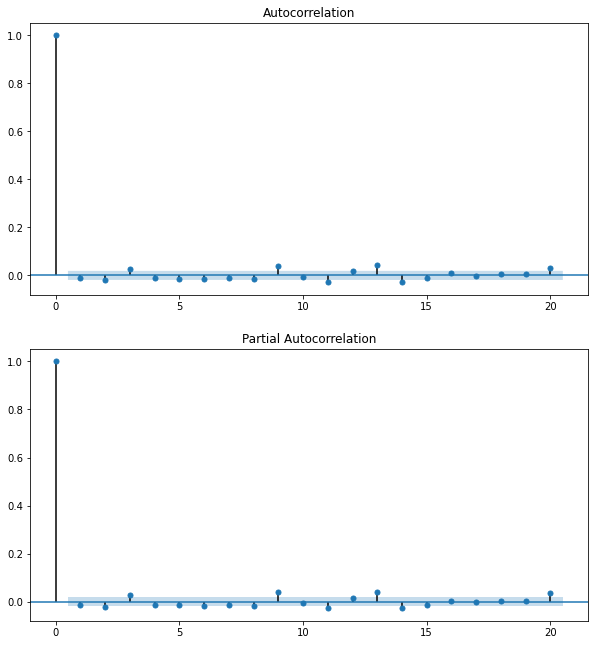

In [180]:
fig, axes = plt.subplots(2,1, figsize=(10,11))
plot_acf(chg_gold_value, lags=20, ax=axes[0])
plot_pacf(chg_gold_value, lags=20, ax=axes[1])
plt.show()

The sample autocorrelation function, or ACF, shows not only the lag-one autocorrelation from the last chapter, but the entire autocorrelation function for different lags. 

Any significant non-zero autocorrelations implies that the series can be forecast from the past. There is no clear pattern in these ACF and PACF. 

In [181]:
result = adfuller(gold_value_df['Value'])
print("The p-value for the Augmented Dickey-Fuller test is {}".format(result[1]))

The p-value for the Augmented Dickey-Fuller test is 0.95224007691474


The data seems to follow a random walk with drift. 

The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. 

In this case, the p-value is much higher than 0.05 - it's 0.95. Therefore, we cannot reject the null hypothesis that the gold_value_df is a random walk. 

In [182]:
mod_ar1 = ARMA(chg_gold_value, order=(1,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) model is {}".format(res_ar1.aic))

The AIC for an AR(1) model is 78090.61952024372


C:\Users\User\anaconda3\envs\py36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [183]:
mod_ar2 = ARMA(chg_gold_value, order=(2,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) model is {}".format(res_ar2.aic))

The AIC for an AR(2) model is 78087.96916561745


In [184]:
mod = ARIMA(chg_gold_value, order=(1,1,1))
res = mod.fit()
print("The AIC for an ARIMA(1,1,1) model is {}".format(res.aic))

The AIC for an ARIMA(1,1,1) model is 78095.39445228403


Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARIMA(1,1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARIMA(1,1,1) models have one more parameter than the AR(1) has.

AR(2) has the lowest AIC values among the three models.

## Forecasting

Finally, the gold value will be forecasted over the next 20 years using an ARMA(2) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, the gold value data was determined to follow a random walk and the data was differenced. This time, the cumulative sums of the gold value changes will be measured to get the gold value forecast.

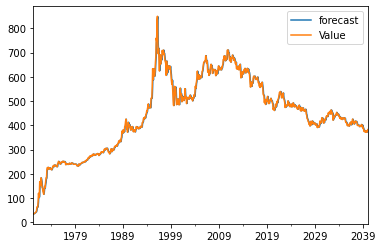

In [188]:
mod_new = ARIMA(gold_value_df, order=(2,1,0))
res_new = mod_new.fit()

res_new.plot_predict(start='1970-04', end='2040-03')
plt.show()

According to the model, the gold value is forecasted to drop in 20 years.